


# PyTorch - Session 1: Tensors and functions for using them
## Thomas Viehmann, MathInf GmbH

In [1]:
import torch

These slides are (c) 2022 by MathInf GmbH except graphics with attribution (and the PyTorch logo above).

Please use what you learn but don't just take my slides without asking. Thank you!

Thanks to: Piotr Bialecki for feedback on the draft of these slides and many interesting perspectives on PyTorch and teaching PyTorch. Luca Antiga made some graphics for our book that I borrowd. The many students that have contributed comments and questions to make things better.

In [2]:
%matplotlib inline
from matplotlib import pyplot
import numpy

assert torch.cuda.is_available(), "Some examples need the GPU"
torch.cuda.get_device_name()


'NVIDIA GeForce RTX 3090'

# Hello

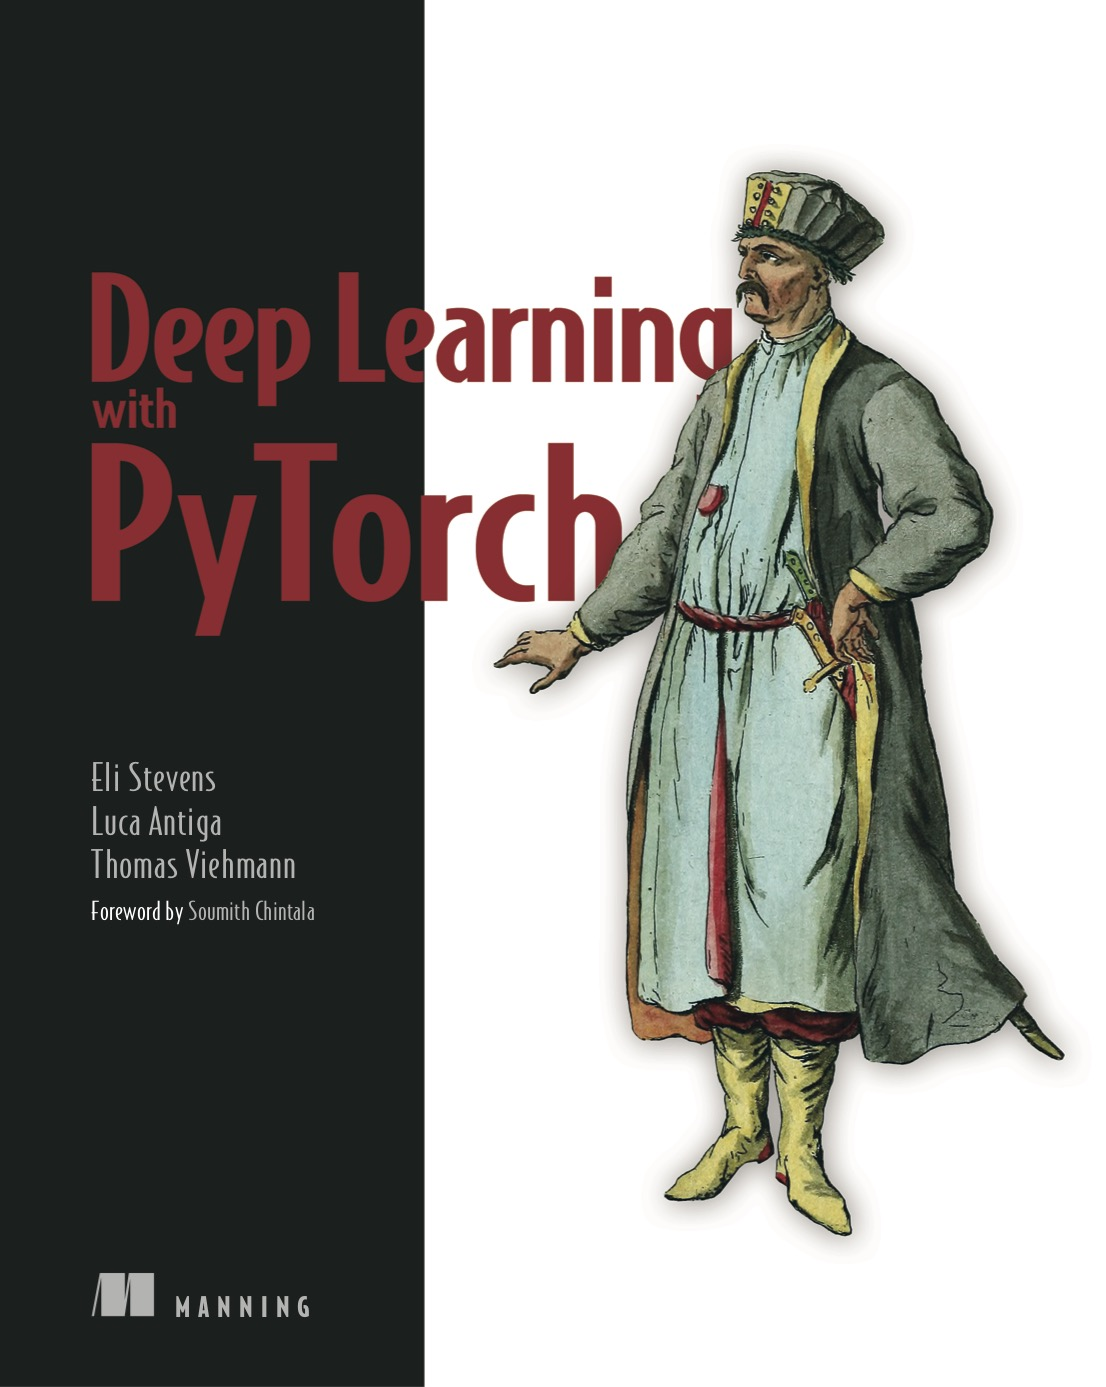

I'm Thomas Viehmann.

- In 2018 I founded MathInf GmbH, a boutique ML research and development consultancy & PyTorch training company, located in Münster, Germany
- With 170 patches I am one of the most prolific independent contributors to PyTorch, and am a PyTorch Core Developer (but only in the honorific sense)
- With Eli Stevens and Luca Antiga, I wrote [Deep Learning with PyTorch](https://pytorch.org/deep-learning-with-pytorch).
- I do some online courses (advertised on my blog [lernapparat.de](https://lernapparat.de/)), but also instructor led training and bespoke trainings/workshops
- Background: PhD in pen and paper Mathematics, have been an Actuary & Consultant for 10 years, Debian Developer emeritus





# PyTorch is ... Tensors

At the heart of PyTorch is the Tensor data type. It is a multidimensional array.

To see why it is useful, let us briefly look at some context.

## Representing everything as floating point numbers

Many things in our world can be represented as multidimensional arrays of floating point numbers.

Anything that can be represented as an image can be an array of RGB pixels, from cat photos to weather maps.




## Everything as floating point numbers and multi-dimensional arrays of them

Sound can be seen as a one-dimensional waveform (or with multiple channels).




We will look at this in depth in a later session. We will also see how also discrete things like words can be represented in floating point vectors.

So how do we represent them in our programs?

## Python lists

If you know Python, you have seen these:

In [39]:
l = [1.0, 2.0, 4.0]
l

[1.0, 2.0, 4.0]

In [40]:
l[0]

1.0

In [41]:
l[2] = 3.0
l

[1.0, 2.0, 3.0]

## The problem with Python lists

One important thing to know about lists is this: Each list element is a Python object in its own regard and Python makes no assumptions on what it represents. Fun fact, you can even append a list into itself:

In [42]:
a = []
a.append(a)
a

[[...]]

While this is often handy, it is terribly inefficient for handling large amounts of floating point numbers.

## Enter Tensors: Multidimensional Arrays

On the surface, tensors are much more uniform than lists:
- n-dimensional with axes of fixed size, n = number of axes (NumPy speak) or dimensions (PyTorch)
-  0d (i.e. scalars - single numbers), 1d (vectors), 2d (matrices), 3d...
- same type of data (one number) at every entry

This allows them to be represented much more efficiently, as we will see in detail in a bit.
For Tensors, only the entire tensor is a Python object, Python knows nothing of the entries.

If you know NumPy: Tensors are much like NumPy arrays (intentionally) and PyTorch has an explicit goal of mirroring the NumPy API where applicable.

## Our first tensor

In [43]:
t = torch.tensor([[0.7071, 1.4142, 1.6180],
                  [0.8346, 2.7183, 3.1416]])
t

tensor([[0.7071, 1.4142, 1.6180],
        [0.8346, 2.7183, 3.1416]])

## Tensors are arrays
Tensors have a shape (the size of each dimension):


In [44]:
t.dim(), t.shape

(2, torch.Size([2, 3]))

Indexing - also with assignments - works as expected. Use .item() to get numbers from tensors.

In [9]:
t[1, 2]

tensor(3.1416)

In [10]:
t[1, 2] = 3.141592653589793
t, t[1, 2].item()

(tensor([[0.7071, 1.4142, 1.6180],
         [0.8346, 2.7183, 3.1416]]),
 3.1415927410125732)

Slicing works just like for lists/in NumPy

In [11]:
t[:, 1:], t[:, ::2]

(tensor([[1.4142, 1.6180],
         [2.7183, 3.1416]]),
 tensor([[0.7071, 1.6180],
         [0.8346, 3.1416]]))

`None` adds a new (size 1) dimension.

In [12]:
t[1,2], t[1, 2, None]

(tensor(3.1416), tensor([3.1416]))

"Advanced indexing" with masks also works

In [47]:
t[t < 1] = 0
t

tensor([[0.0000, 1.4142, 1.6180],
        [0.0000, 2.7183, 3.1416]])

## Tensor element types

Tensors always hold elements (numbers) of a given scalar type, the "data type" or dtype.
There are many:


- `torch.float32` aka `torch.float`
- `torch.float64` aka `torch.double`
- `torch.float16`/`half`, `bf16`
- `int8`, `uint8`, `int16`, `int32`/`int`, `int64`/`long`
- `torch.bool`
- `torch.complex32`, `complex64`, `complex128` (with half/float/double real and imaginary part)
- `torch.quint8` etc. for quantized tensors

For PyTorch (with its GPU focus), `float32` is perhaps the most common dtype.

For indexing, `int64` is often used, but `int32` can be much faster if it works, e.g. on GPUs.

Query dtype

In [48]:
t.dtype

torch.float32

Specify dtype in factory functions

In [51]:
torch.ones((1, 3), dtype=torch.float64)

tensor([[1., 1., 1.]], dtype=torch.float64)

Convert (i.e. copy to a new tensor of the desired dtype if necessary)

In [16]:
t.to(torch.double)

tensor([[0.0000, 1.4142, 1.6180],
        [0.0000, 2.7183, 3.1416]], dtype=torch.float64)

Old way (less neat in some ways):

In [17]:
t.double()

tensor([[0.0000, 1.4142, 1.6180],
        [0.0000, 2.7183, 3.1416]], dtype=torch.float64)

## Putting Tensors on the GPU

Tensors have a device.
We can move between devices and just as we convert between dtypes.

In [52]:
t.device

device(type='cpu')

In [53]:
t.to(dtype=torch.float64, device="cuda")  # if we have a GPU

tensor([[0.0000, 1.4142, 1.6180],
        [0.0000, 2.7183, 3.1416]], device='cuda:0', dtype=torch.float64)

You can also create device objects. Note that `"cuda"` is an alias for the "default" gpu, `"cuda:X"` for a given one.

In [54]:
torch.device('cuda'), torch.device('cuda:0')

(device(type='cuda'), device(type='cuda', index=0))

## Other devices

- AMD ROCm has separate devices at the lower levels (in C++ libtorch) but completely masquerades as CUDA in Python.
- There are many more devices with varying degrees of support from not at all to flexible. Of particular note are "Meta" (to do "as if" shape computations without creating proper tensors) and "Lazy".
- Here are some directly from `c10/core/DeviceType.h` (but more in there):
```
  HIP // AMD HIP -> cuda from Python for HIP-PyTorch
  ORT // ONNX Runtime / Microsoft
  XLA // XLA / TPU
  Vulkan // Vulkan
  Metal // Metal
  MLC // ML Compute / Apple
  Meta // Meta (tensors with no data)
  Lazy // Lazy Tensors
```
 

## Tensors - a scenic view of memory blobs

Internally, Tensors are (most often) stored as a blob of memory.

In [55]:
t.storage()

 0.0
 1.414199948310852
 1.6180000305175781
 0.0
 2.7183001041412354
 3.1415998935699463
[torch.FloatStorage of size 6]

In [22]:
t.stride(), t.shape, t.storage_offset(), t.data_ptr(), t[1, 2]

((3, 1), torch.Size([2, 3]), 0, 64090944, tensor(3.1416))

In [56]:
t

tensor([[0.0000, 1.4142, 1.6180],
        [0.0000, 2.7183, 3.1416]])

Indexing and slicing (and taking diagonals, too) do *not* copy, but create views:

In [27]:
v = t[:, 2:]

In [28]:
v.stride(), v.shape, v.storage_offset(), v.data_ptr(), v.storage().data_ptr() 

((3, 1), torch.Size([2, 1]), 2, 64090952, 64090944)

In [29]:
v, v.storage()

(tensor([[1.6180],
         [3.1416]]),
  0.0
  1.414199948310852
  1.6180000305175781
  0.0
  2.7183001041412354
  3.1415927410125732
 [torch.FloatStorage of size 6])

(`data_ptr` already subsumes the storage offset...)

## Tensor metadata

The size, stride, and offset and `data_ptr` (in addition to dtype, device) are key Tensor _metadata_. They inform PyTorch of how it should resolve a tensor location to a memory location.

The metadata is always stored on the CPU, but typically provided to CUDA kernels as we go along. (Pro aside: The "meta" device is for tensors with _only_ metadata.)

So in the above example, the index `[1, 2]` transforms into the memory location `1 * t.stride(0) + 2 * t.stride(1)` = `1 * 3 + 2 * 1`, i.e. memory location 5 (with 0-based counting).

A tensor where the strides as descending and there are no "gaps" in the storage is called `contiguous`. You can force to get one (by copying as needed) through `t = t.contiguous()`.

More recently, PyTorch has also gained options for the memory format (which is the fastest moving axis) for performance reasons, but we'll skip this for now.

## Common View-Creating Operations

- `.t()` and `.transpose(...)`, `.permute(...)`: change the order of axes in the stride/size metadata,
- `.view(...)`: change the stride/size (but might not work, if the new layout cannot be expressed in stride/size)
- (Single) Indexing: drops one dimension, changes offset for indices other than `0`.
- slicing, `.narrow`: reduce sizes, change offset, interleave (`::2`) changes stride,
- `.as_strided`: replaces the stride/size metadata with something else, powerful but _dangerous_ in the sense that there are no sanity checks.

Special case: `reshape` creates a view (like `view`) if possible and copies the tensor if not.


# If you need a copy

You can use `t.clone()` to forcefully create a copy (or `.to(device=..., dtype=..., copy=True)` if you need a conversion that is guaranteed to copy if the tensor is already in the right form.

In [30]:
t2 = t.clone()
t.data_ptr(), t2.data_ptr(), t, t2  # different address, same content

(64090944,
 812359808,
 tensor([[0.0000, 1.4142, 1.6180],
         [0.0000, 2.7183, 3.1416]]),
 tensor([[0.0000, 1.4142, 1.6180],
         [0.0000, 2.7183, 3.1416]]))

## Reflecting on Storage and views

- One rarely needs the `Storage` bits and in a way it is a very legacy concept and it might be better to think of one tensor as the "base" tensor owning the memory and the others as views of this base

- One thing all this implies is that if I have a large tensor and create a small view of it and then let the large tensor go out of scope, the memory will not be recovered until the small tensor (and generally all views) are ready for deallocation.

- Later, we will see subtle interactions of views with automatic differentiation.

## Generalized tensors are tensors, too.

- These were strided tensors
- There are other Tensor types: Sparse, on TPU,...
- Quantized is a bit special, but similar in spirit.

In [17]:
t.layout

torch.strided

In [59]:
s = torch.sparse_coo_tensor(torch.arange(10)[None], torch.randn(10))
s, s.layout

(tensor(indices=tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
        values=tensor([-0.3948, -1.0103,  2.2661, -0.0862, -1.5707,  0.2405,
                        0.2252,  0.8517, -1.0812,  0.0760]),
        size=(10,), nnz=10, layout=torch.sparse_coo),
 torch.sparse_coo)

### Where to get Tensors?

PyTorch has ~90 factory functions:

- torch.tensor, torch.sparse_coo_tensor
- torch.zeros, ones, randn, ...
- torch.zeros_like, ones_like, randn_like, ...

Conversion to and from Numpy works without copying (there also is `torch.utils.dlpack` for a similar effect with GPU tensors)

In [60]:
a = t.numpy()
t2 = torch.from_numpy(a)
t2.data_ptr() == t.data_ptr()

True

Careful: Numpy uses a dtype of float64 by default, PyTorch float32 (as you typically want that for GPUs)

Sometimes you see FloatTensor, .data, ... in old code or copied from old code. Don't do that.

There also are `torch.utils.dlpack.to_dlpack` / `from_dlpack` for interchange with GPU tensors.

### Saving and loading tensors

Saving and loading tensors and dicts, lists of them (and other types) can be done though `torch.save` and `torch.load`. Optionally, you can specify where the tensors should be loaded to (the default is to put GPU tensors back on the GPU).

In [61]:
torch.save(t, 'my-tensor.pt')
torch.load('my-tensor.pt', map_location="cpu")

[tensor([[0.0000, 1.4142, 1.6180],
         [0.0000, 2.7183, 3.1416]]),
 tensor([[0.0000, 1.4142, 1.6180],
         [0.0000, 2.7183, 3.1416]])]

**Style advice**: Do use `.pt` as an extension, not `.pth` or anything else (`pth` collides with Python "path" files).

## HDF5  format for interchange (1)

If you want a non-PyTorch-specific format, you could use numpy or better yet, go with a well-standardized format called HDF5 (from https://www.hdfgroup.org/solutions/hdf5).

A Python API is provided by the `h5py` package.
After opening a file (for `w`riting), you can store numpy arrays under a string key with `f.create_dataset` (yes, the terminology is different to what we are used to).

In [64]:
import h5py

f = h5py.File('/tmp/somedata.hdf5', 'w')
f.create_dataset('random.something', data=torch.randn(5, 5))
f.create_dataset('random.something_else', data=torch.randn(5, 5).numpy())
f.close()

## HDF5  format for interchange (2)

For reading you can use key indexing. Note that you need to get the numpy array from the dataset in order to use it with PyTorch.

In [69]:
f = h5py.File('/tmp/somedata.hdf5', 'r')
print(f.keys())
dset = f['random.something']
t = torch.from_numpy(dset.__array__())
f.close()
t

<KeysViewHDF5 ['random.something', 'random.something_else']>


tensor([[ 0.5242,  0.3099, -2.2608, -0.7891, -0.7144],
        [-0.5163, -1.1924, -0.5843,  0.3038,  0.0639],
        [ 0.5551,  1.1704,  0.1938, -0.3973, -0.7985],
        [ 0.0566,  0.4130,  1.4565, -0.0912, -0.9117],
        [-1.3840,  0.5299, -1.0317, -1.2282, -0.2853]])

Keep in mind that the semantics (e.g. which axis of a tensor is channel, width and height) of the stored data is not standardized.

# PyTorch is ... operations on tensors

PyTorch mostly follows numpy in naming. Most things are available as methods (`t.tanh()`) and functions (`torch.tanh(t)`). More neural-network specific things are in `torch.nn.functional`.

I'm not going to list them, but generally we follow NumPy naming, the [documentation](https://pytorch.org/docs/) has all the details.

In [21]:
t.tanh(), torch.tanh(t)

(tensor([[0.0000, 0.8884, 0.9243],
         [0.0000, 0.9913, 0.9963]]),
 tensor([[0.0000, 0.8884, 0.9243],
         [0.0000, 0.9913, 0.9963]]))

# Inplace operations

Inplace operations modify their inputs instead of creating new tensors as outputs are signaled by a trailing underscore `_`.

Technically, you modify the memory where the tensor lives, i.e. the storage we saw above. This means you change all tensors that use this storage (unless they use a part you don't modify).

In [73]:
z = torch.randn(5, 5)
z.tanh_()
z

tensor([[ 1.6725,  1.0848,  1.8716, -1.8442,  1.3593],
        [ 1.2894, -1.1489,  1.4654,  0.8607,  0.0321],
        [ 1.5636, -1.6464,  1.7151, -1.4877,  1.1428],
        [-0.2716,  0.2855, -0.4706, -0.8423,  0.9968],
        [-0.1502,  1.7825, -1.4524, -1.4386,  1.9051]])


The `torch.nn.functional` namespace (sometimes mapped to `F.`) contains functions that are more neural-network related.


In [74]:
w = torch.randn(10, 5)
i = torch.randn(2, 5)
torch.nn.functional.linear(i, w)

tensor([[ 0.4458,  0.6701,  0.7892,  4.0640,  1.6431,  1.6561, -3.2770,  3.6839,
         -4.3389,  2.8421],
        [ 0.2851,  0.0994,  0.7793, -0.5878,  1.2896, -0.3420, -0.4463,  0.5132,
          1.6639, -0.8362]])

## Some important core PyTorch API

The PyTorch API is huge, literally thousands of functions.
At a very high level, these are some important "core" classes:

- Creation ops, like `tensor`, `ones` and `from_numpy`.
  - these include many random sampling functions (`randn`, `multinomial`), but there are also (somewhat peculier) ones like `Tensor.uniform_`.
- Indexing, slicing, joining, mutating op
- Math ops
  - Pointwise ops like `tanh` and `sqrt`, `add` (aka `+` operator), comparisons
  - Reduction ops like `sum`, `prod`, `mean` , `std` , `norm`, `max`
  - Matrix multiplication and other linear algebra
  - more specialized math operations, like fft, etc.
  - Serialization like `load` and `save`
- Neural-Network-Functions in `torch.nn.functional`
- Admin—Functions, e.g. `set_num_threads`, `torch.cuda.is_available()`

## Exercises

- Create a small 2d (or even 3d tensor?) tensor and draw a picture of how strides and shapes work for it.
  How would you illustrate transposing the tensor?
- Given a (random) 2x4 tensor `t`, what is the difference between `t.view(4, 2)` and `t.transpose()`?
- Compute
   $c = \sqrt{a^2 + b^2}$ 
  for some tensors `a` and `b`, find the mathematical functions you need for this.
- Take a 2d tensor of size 5x5, print it, take a slice leaving out the first and last column and row each.
  Do an inplace operation on the slice and print the original 2d tensor.


Next session: Data handling and data representation!